In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataa=pd.read_csv("weatherHistory.csv")
np.random.seed(0)

In [4]:
#missing data
mis_count=dataa.isnull().sum()
mis_count[:10]#in first 10 columns

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [5]:
#total missing values
total_cells = np.product(dataa.shape)
total_mis = mis_count.sum()

# percentage of mssing data
percent = (total_mis/total_cells) * 100
print(percent)

0.04872839621369994


In [6]:
dataa.info()#information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
title=['Formatted Date','Apparent Temperature (C)','Humidity','Summary']
data_1=dataa[title]

In [8]:
data_1.rename({'Apparent Temperature (C)': 'Apparent Temperature'}, axis=1, inplace=True)
data_1['Formatted Date']=pd.to_datetime(data_1['Formatted Date'],utc=True)
data_2= data_1.set_index('Formatted Date')
data_2.resample('M').mean()


,Apparent Temperature,Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-31 00:00:00+00:00,21.383094,0.674046
2016-09-30 00:00:00+00:00,18.355833,0.688833
2016-10-31 00:00:00+00:00,8.923947,0.799906


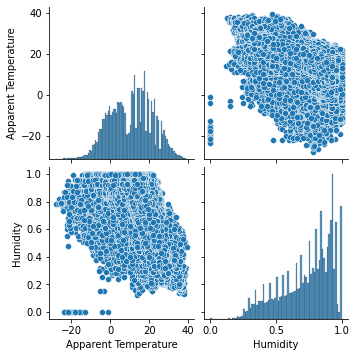

In [9]:
sns.pairplot(data_2,kind='scatter')
plt.show()

<Figure size 2160x2160 with 0 Axes>

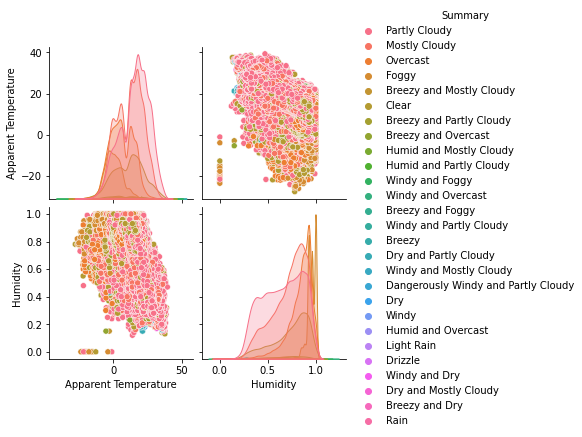

In [10]:
plt.figure(figsize=(30,30))
sns.pairplot(data_2, hue="Summary") 
plt.show() 

<Figure size 1152x432 with 0 Axes>

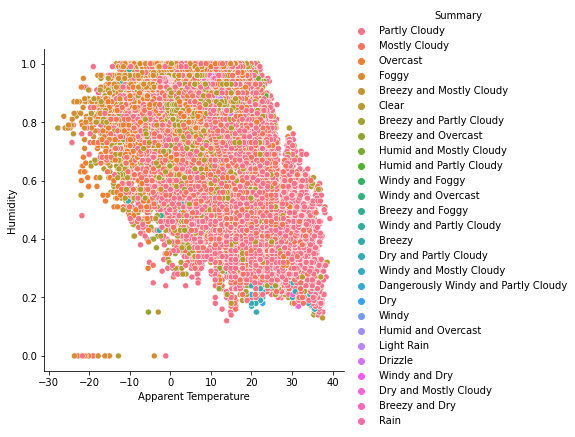

In [11]:
plt.figure(figsize=(16,6))
sns.relplot( x ='Apparent Temperature',y='Humidity',color='purple',hue="Summary" , data=data_2)

<AxesSubplot:xlabel='Apparent Temperature', ylabel='Humidity'>

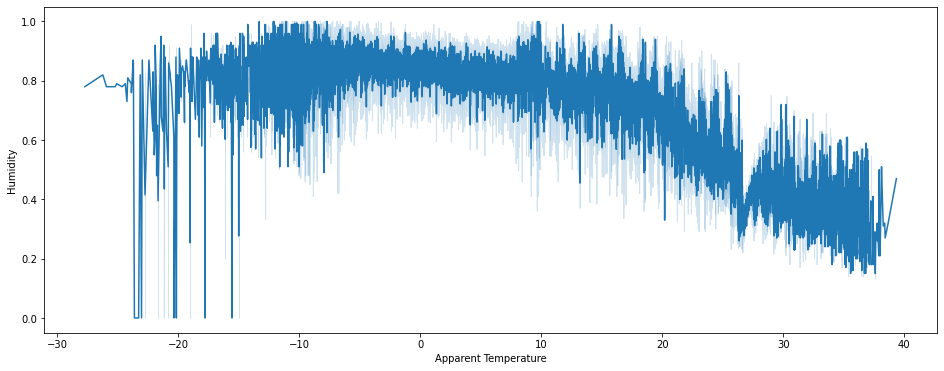

In [12]:
#width height of line chart
plt.figure(figsize=(16,6))

# Line chart showing  
sns.lineplot(x ='Apparent Temperature',y='Humidity', data=data_2)

In [13]:
#testing analysis on may
data_may=data_2[data_2.index.month==5]
data_may.head()

,Apparent Temperature,Humidity,Summary
Formatted Date,,,
2006-05-31 22:00:00+00:00,6.133333,0.86,Partly Cloudy
2006-05-31 23:00:00+00:00,7.294444,0.86,Partly Cloudy
2006-05-01 00:00:00+00:00,11.133333,0.91,Overcast
2006-05-01 01:00:00+00:00,11.600000,0.62,Mostly Cloudy
2006-05-01 02:00:00+00:00,11.088889,0.71,Mostly Cloudy


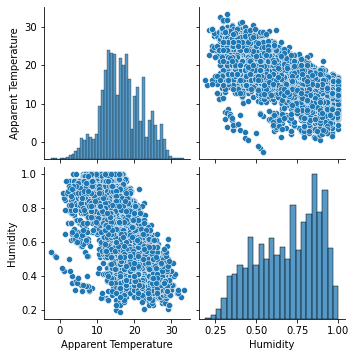

In [14]:
sns.pairplot(data_may,kind='scatter')
plt.show()

<Figure size 2304x864 with 0 Axes>

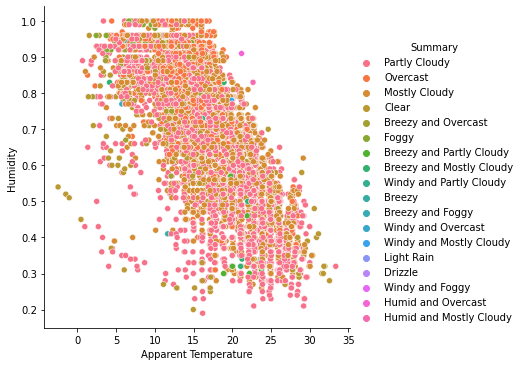

In [16]:
plt.figure(figsize=(32,12))

sns.relplot( x ='Apparent Temperature',y='Humidity',color='purple',hue="Summary" , data=data_may )

### conlusion: By the analysis we get conclusion that temperature has been effected by Global warming and climate change. Temperature is changing in an unpredictable manner.